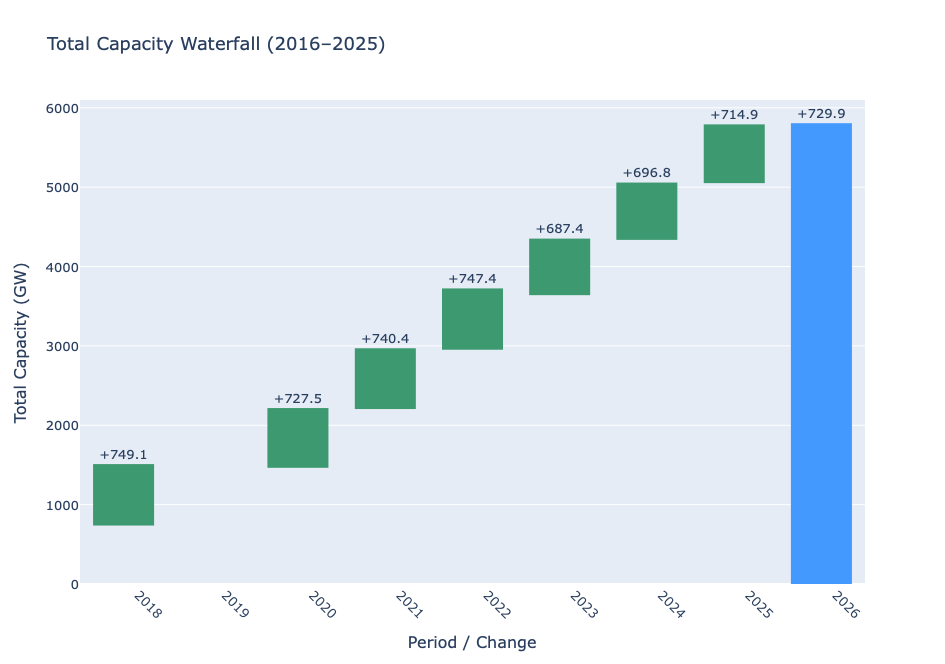

In [1]:
import plotly.graph_objects as go
import pandas as pd

# Your data
data = {
    'Period':  ['2016-11', '2017-11', '2019-11', '2020-11', '2021-11', 
                '2022-11', '2023-11', '2024-11', '2025-11'],
    'Solar':   [ 89.97,  115.34,  130.48,  141.32,  141.32, 
                154.45,  184.23,  185.56,  190.55],
    'Other':   [675.73,  633.79,  597.07,  599.05,  606.05, 
                532.96,  512.56,  529.38,  539.31],
    'Total':   [765.70,  749.13,  727.55,  740.37,  747.37, 
                687.41,  696.79,  714.94,  729.86]
}

df = pd.DataFrame(data)

# ────────────────────────────────────────
# Prepare waterfall data
# ────────────────────────────────────────

periods = df['Period'].tolist()
measures = ['absolute'] + ['relative'] * (len(periods) * 2 - 1) + ['total']

labels = []
values = []
base = 0

for i in range(len(df)):
    if i == 0:
        # Starting total
        labels.append(f"Start {periods[i]}")
        values.append(df['Total'].iloc[0])
    else:
        # Change in Solar
        delta_solar = df['Solar'].iloc[i] - df['Solar'].iloc[i-1]
        labels.append(f"+ Solar {periods[i]}")
        values.append(delta_solar)
        
        # Change in Other
        delta_other = df['Other'].iloc[i] - df['Other'].iloc[i-1]
        labels.append(f"+ Other {periods[i]}")
        values.append(delta_other)
    
    # Final total of each period (only for connector / check)
    if i > 0:
        labels.append(periods[i])
        values.append(df['Total'].iloc[i])

# But we only want to show start + changes + final totals
# Plotly waterfall can handle connector automatically

fig = go.Figure(go.Waterfall(
    name = "Capacity change",
    orientation = "v",
    measure = ["absolute"] + ["relative"] * (len(values)-2) + ["total"],
    x = labels,
    textposition = "outside",
    text = [f"{v:+.1f}" if v != 0 else "" for v in values],
    y = values,
    connector = {"line": {"color": "rgb(63, 63, 63)"}},
))

fig.update_layout(
    title = "Total Capacity Waterfall (2016–2025)",
    xaxis_title = "Period / Change",
    yaxis_title = "Total Capacity (GW)",
    waterfallgap = 0.3,
    height = 650,
    font = dict(size=13),
    showlegend = False
)

# Better x-label rotation
fig.update_xaxes(tickangle=45)

fig.show()

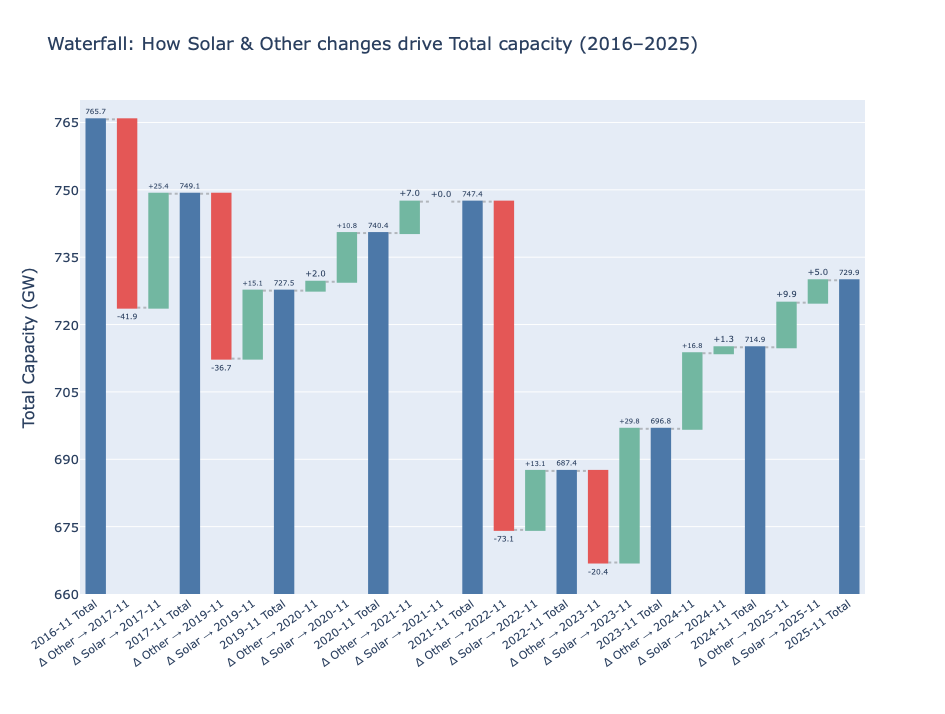

In [9]:
import plotly.graph_objects as go
import pandas as pd

# Your data (using the values exactly as provided)
data = {
    'Period':  ['2016-11', '2017-11', '2019-11', '2020-11', '2021-11',
                '2022-11', '2023-11', '2024-11', '2025-11'],
    'Solar':   [ 89.97,  115.34,  130.48,  141.32,  141.32,
                154.45,  184.23,  185.56,  190.55],
    'Other':   [675.73,  633.79,  597.07,  599.05,  606.05,
                532.96,  512.56,  529.38,  539.31],
    'Total':   [765.70,  749.13,  727.55,  740.37,  747.37,
                687.41,  696.79,  714.94,  729.86]
}

df = pd.DataFrame(data)

# ───────────────────────────────────────────────
# Build waterfall steps
# ───────────────────────────────────────────────

x_labels = []
measures = []
values = []
text = []
colors = []

# Starting point
x_labels.append("2016-11 Total")
measures.append("absolute")
values.append(df['Total'].iloc[0])
text.append(f"{df['Total'].iloc[0]:.1f}")
colors.append("#4c78a8")   # neutral blue for start

for i in range(1, len(df)):
    prev_total = df['Total'].iloc[i-1]
    curr_total = df['Total'].iloc[i]
    
    delta_s = df['Solar'].iloc[i] - df['Solar'].iloc[i-1]
    delta_o = df['Other'].iloc[i] - df['Other'].iloc[i-1]
    
    
    # Other change
    x_labels.append(f"Δ Other → {df['Period'].iloc[i]}")
    measures.append("relative")
    values.append(delta_o)
    text.append(f"{delta_o:+.1f}")
    colors.append("#72b7a1" if delta_o >= 0 else "#e45756")   # green ↑ / red ↓

    # Solar change
    x_labels.append(f"Δ Solar → {df['Period'].iloc[i]}")
    measures.append("relative")
    values.append(delta_s)
    text.append(f"{delta_s:+.1f}")
    colors.append("#f4a261" if delta_s >= 0 else "#e45756")   # orange ↑ / red ↓
    
    # Ending total for this period
    x_labels.append(f"{df['Period'].iloc[i]} Total")
    measures.append("total")
    values.append(curr_total)
    text.append(f"{curr_total:.1f}")
    colors.append("#4c78a8")

# ───────────────────────────────────────────────
# Create figure
# ───────────────────────────────────────────────


fig = go.Figure(go.Waterfall(
    name          = "Capacity changes",
    orientation   = "v",
    measure       = measures,
    x             = x_labels,
    y             = values,
    text          = text,
    textposition  = "outside",
    textfont      = dict(size=11),
    connector     = {"line": {"color": "rgba(100,100,100,0.4)", "dash": "dot"}},
    increasing    = {"marker": {"color": "#72b7a1"}},
    decreasing    = {"marker": {"color": "#e45756"}},
    totals        = {"marker": {"color": "#4c78a8"}},
))

fig.update_layout(
    title       = "Waterfall: How Solar & Other changes drive Total capacity (2016–2025)",
    xaxis_title = "",
    yaxis_title = "Total Capacity (GW)",
    height      = 700,
    font        = dict(size=13),
    showlegend  = False,
    margin      = dict(b=120),
    waterfallgap= 0.35,
    yaxis       = dict(
        range     = [660, 770],          # starts just below lowest total
        tickmode  = 'linear',
        dtick     = 15,                  # finer steps
    ),

)

fig.update_xaxes(tickangle= -35, tickfont=dict(size=11))

fig.show()

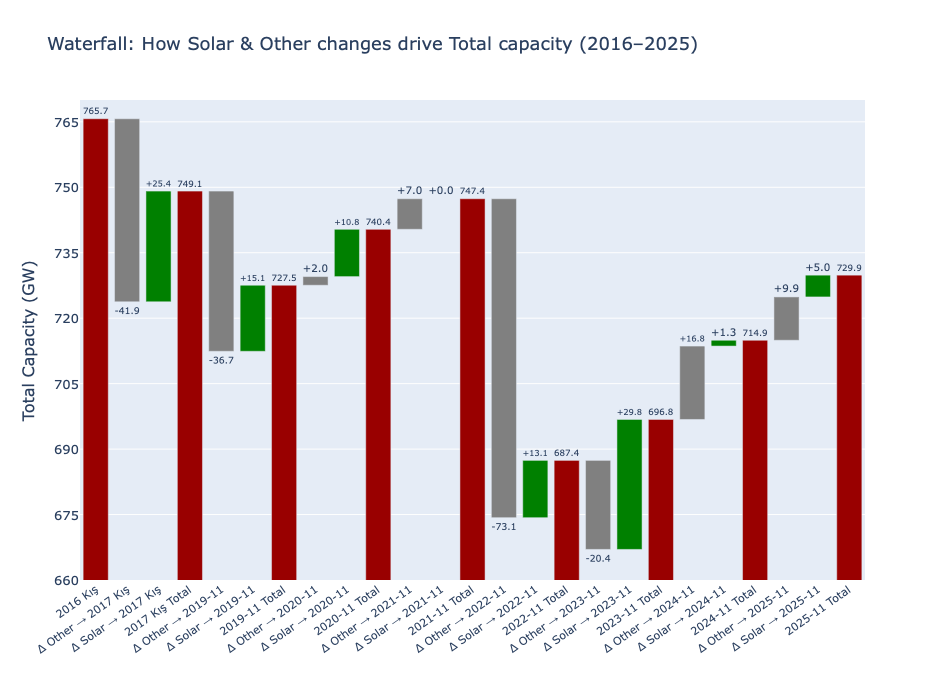

In [23]:
import plotly.graph_objects as go
import pandas as pd

# Data
data = {
    'Period':  ['2016 Kış', '2017 Kış', '2019-11', '2020-11', '2021-11',
                '2022-11', '2023-11', '2024-11', '2025-11'],
    'Solar':   [ 89.97,  115.34,  130.48,  141.32,  141.32,
                154.45,  184.23,  185.56,  190.55],
    'Other':   [675.73,  633.79,  597.07,  599.05,  606.05,
                532.96,  512.56,  529.38,  539.31],
    'Total':   [765.70,  749.13,  727.55,  740.37,  747.37,
                687.41,  696.79,  714.94,  729.86]
}

df = pd.DataFrame(data)

# ───────────────────────────────────────────────
# Calculate Waterfall Steps for go.Bar
# ───────────────────────────────────────────────

x_labels = []
y_values = []  # The height of the bar
bases = []     # The starting point (bottom) of the bar
text = []
colors = []

# Tracker for the running total
current_level = 0

# 1. Starting Point (2016)
start_val = df['Total'].iloc[0]

x_labels.append("2016 Kış")
y_values.append(start_val)
bases.append(0)             # Totals start at 0
text.append(f"{start_val:.1f}")
colors.append("#990000")    # Total Color
current_level = start_val

# 2. Loop through periods
for i in range(1, len(df)):
    curr_total = df['Total'].iloc[i]
    
    delta_o = df['Other'].iloc[i] - df['Other'].iloc[i-1]
    delta_s = df['Solar'].iloc[i] - df['Solar'].iloc[i-1]
    
    # -- Bar 1: Other Change --
    x_labels.append(f"Δ Other → {df['Period'].iloc[i]}")
    y_values.append(delta_o)
    bases.append(current_level)  # Starts where the last bar ended
    text.append(f"{delta_o:+.1f}")
    colors.append("gray")        # Other Color
    current_level += delta_o     # Update running level
    
    # -- Bar 2: Solar Change --
    x_labels.append(f"Δ Solar → {df['Period'].iloc[i]}")
    y_values.append(delta_s)
    bases.append(current_level)
    text.append(f"{delta_s:+.1f}")
    colors.append("green")       # Solar Color
    current_level += delta_s
    
    # -- Bar 3: Ending Total --
    x_labels.append(f"{df['Period'].iloc[i]} Total")
    y_values.append(curr_total)
    bases.append(0)              # Totals always start at 0
    text.append(f"{curr_total:.1f}")
    colors.append("#990000")     # Total Color
    # Reset current_level to exact total to avoid floating point drift
    current_level = curr_total

# ───────────────────────────────────────────────
# Create figure using go.Bar
# ───────────────────────────────────────────────

fig = go.Figure(go.Bar(
    x            = x_labels,
    y            = y_values,
    base         = bases,           # This creates the "floating" waterfall effect
    marker_color = colors,          # go.Bar accepts a list of colors!
    text         = text,
    textposition = "outside",
    textfont     = dict(size=11),
))

fig.update_layout(
    title       = "Waterfall: How Solar & Other changes drive Total capacity (2016–2025)",
    yaxis_title = "Total Capacity (GW)",
    height      = 700,
    font        = dict(size=13),
    showlegend  = False,
    margin      = dict(b=120),
    yaxis       = dict(
        range     = [660, 770],
        tickmode  = 'linear',
        dtick     = 15,
    ),
)

fig.update_xaxes(tickangle=-35, tickfont=dict(size=11))

fig.show()

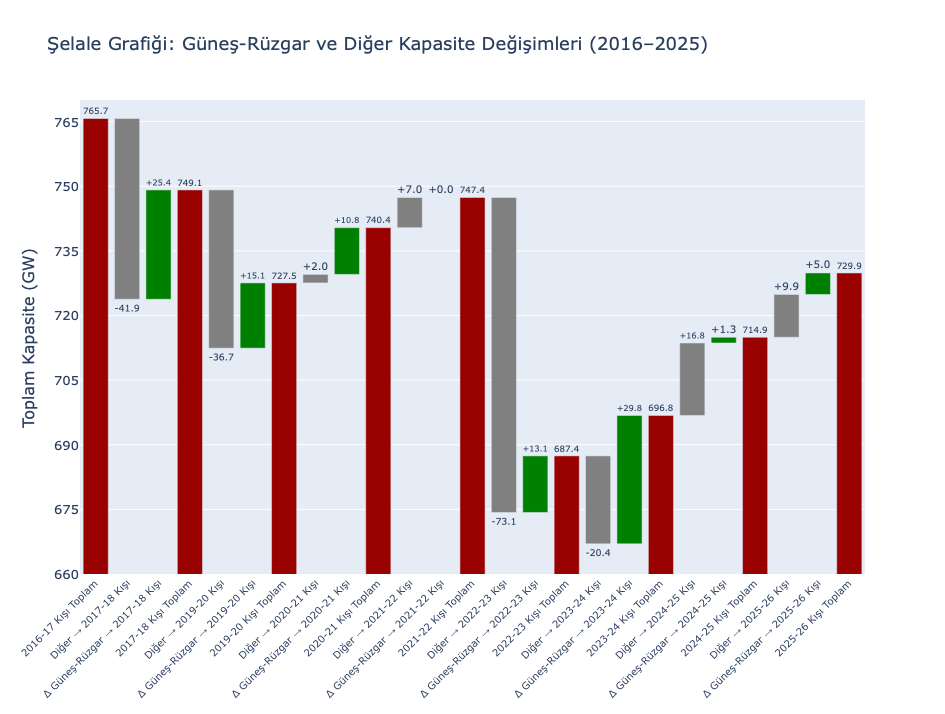

In [28]:
import plotly.graph_objects as go
import pandas as pd

# Data
data = {
    'Period':  ['2016 Kış', '2017 Kış', '2019-11', '2020-11', '2021-11',
                '2022-11', '2023-11', '2024-11', '2025-11'],
    'Solar':   [ 89.97,  115.34,  130.48,  141.32,  141.32,
                154.45,  184.23,  185.56,  190.55],
    'Other':   [675.73,  633.79,  597.07,  599.05,  606.05,
                532.96,  512.56,  529.38,  539.31],
    'Total':   [765.70,  749.13,  727.55,  740.37,  747.37,
                687.41,  696.79,  714.94,  729.86]
}

df = pd.DataFrame(data)

# ───────────────────────────────────────────────
# Helper to format dates to Turkish "YYYY-YY Kışı"
# ───────────────────────────────────────────────
def get_turkish_label(raw_period):
    # Take the first 4 characters (the year) from string
    year = int(str(raw_period)[:4])
    # Calculate next year's last 2 digits
    next_year_short = str(year + 1)[-2:]
    return f"{year}-{next_year_short} Kışı"

# ───────────────────────────────────────────────
# Calculate Waterfall Steps for go.Bar
# ───────────────────────────────────────────────

x_labels = []
y_values = [] 
bases = []    
text = []
colors = []

# Tracker for the running total
current_level = 0

# 1. Starting Point
start_val = df['Total'].iloc[0]
start_label = get_turkish_label(df['Period'].iloc[0])

x_labels.append(f"{start_label} Toplam")  # Changed to Turkish
y_values.append(start_val)
bases.append(0)           
text.append(f"{start_val:.1f}")
colors.append("#990000")   
current_level = start_val

# 2. Loop through periods
for i in range(1, len(df)):
    curr_total = df['Total'].iloc[i]
    formatted_period = get_turkish_label(df['Period'].iloc[i])
    
    delta_o = df['Other'].iloc[i] - df['Other'].iloc[i-1]
    delta_s = df['Solar'].iloc[i] - df['Solar'].iloc[i-1]
    
    # -- Bar 1: Other (Diğer) Change --
    x_labels.append(f"Diğer → {formatted_period}") # Turkish Label
    y_values.append(delta_o)
    bases.append(current_level)
    text.append(f"{delta_o:+.1f}")
    colors.append("gray")      
    current_level += delta_o   
    
    # -- Bar 2: Solar (Güneş-Rüzgar) Change --
    x_labels.append(f"Δ Güneş-Rüzgar → {formatted_period}") # Turkish Label
    y_values.append(delta_s)
    bases.append(current_level)
    text.append(f"{delta_s:+.1f}")
    colors.append("green")     
    current_level += delta_s
    
    # -- Bar 3: Ending Total (Toplam) --
    x_labels.append(f"{formatted_period} Toplam") # Turkish Label
    y_values.append(curr_total)
    bases.append(0)            
    text.append(f"{curr_total:.1f}")
    colors.append("#990000")   
    
    # Reset current_level
    current_level = curr_total

# ───────────────────────────────────────────────
# Create figure using go.Bar
# ───────────────────────────────────────────────

fig = go.Figure(go.Bar(
    x            = x_labels,
    y            = y_values,
    base         = bases,          
    marker_color = colors,         
    text         = text,
    textposition = "outside",
    textfont     = dict(size=11),
))

fig.update_layout(
    title       = "Şelale Grafiği: Güneş-Rüzgar ve Diğer Kapasite Değişimleri (2016–2025)",
    yaxis_title = "Toplam Kapasite (GW)", # Updated to Turkish
    height      = 700,
    font        = dict(size=13),
    showlegend  = False,
    margin      = dict(b=140), # Increased bottom margin for longer labels
    yaxis       = dict(
        range     = [660, 770],
        tickmode  = 'linear',
        dtick     = 15,
    ),
)

fig.update_xaxes(tickangle=-45, tickfont=dict(size=10))

fig.show()

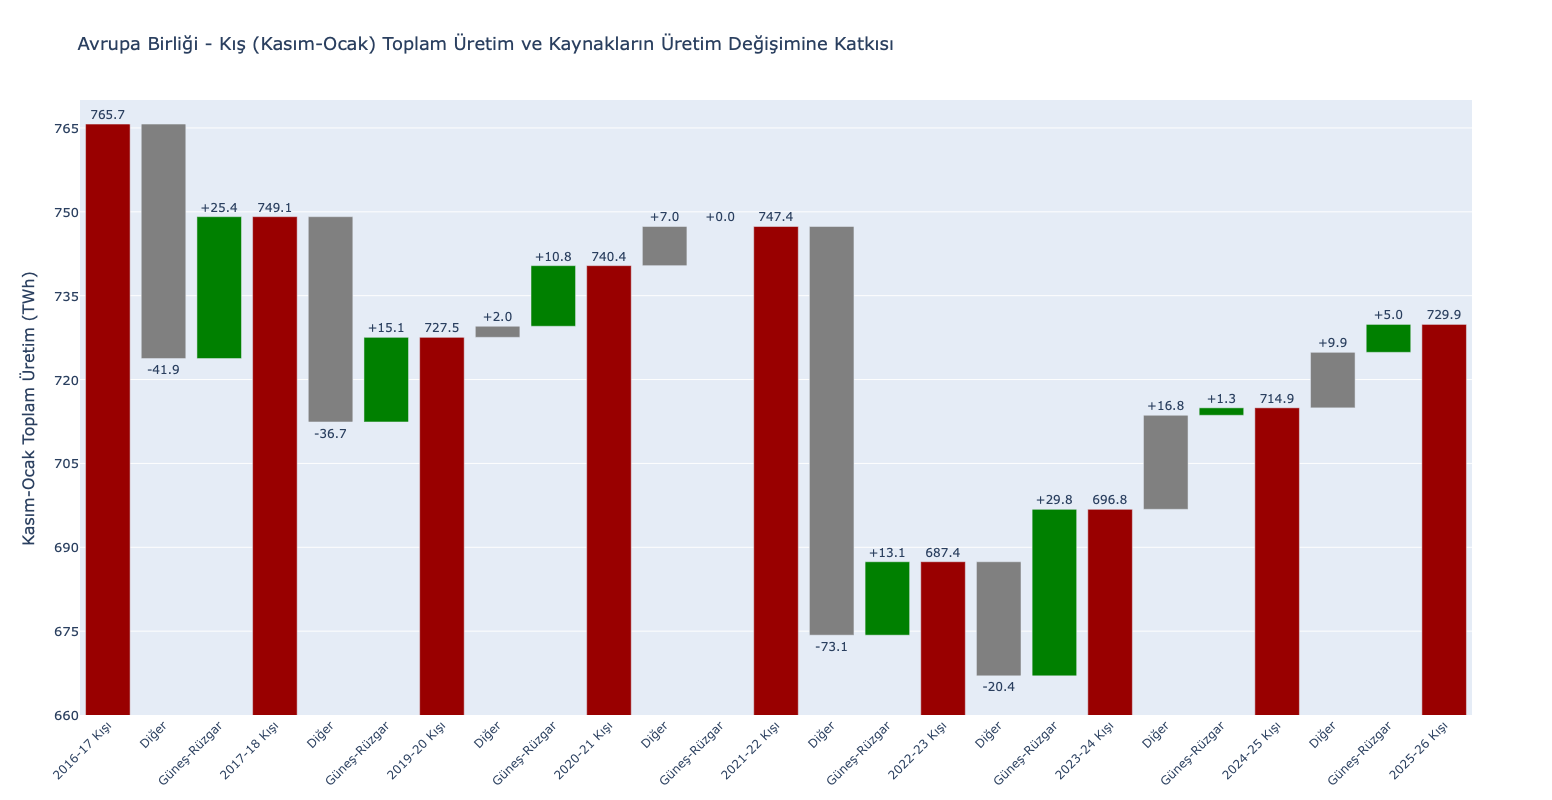

In [4]:
import plotly.graph_objects as go
import pandas as pd

# Data
data = {
    'Period':  ['2016-11', '2017-11', '2019-11', '2020-11', '2021-11',
                '2022-11', '2023-11', '2024-11', '2025-11'],
    'Solar':   [ 89.97,  115.34,  130.48,  141.32,  141.32,
                154.45,  184.23,  185.56,  190.55],
    'Other':   [675.73,  633.79,  597.07,  599.05,  606.05,
                532.96,  512.56,  529.38,  539.31],
    'Total':   [765.70,  749.13,  727.55,  740.37,  747.37,
                687.41,  696.79,  714.94,  729.86]
}

df = pd.DataFrame(data)

# ───────────────────────────────────────────────
# Helper to format dates to Turkish "YYYY-YY Kışı"
# ───────────────────────────────────────────────
def get_turkish_label(raw_period):
    year = int(str(raw_period)[:4])
    next_year_short = str(year + 1)[-2:]
    return f"{year}-{next_year_short} Kışı"

# ───────────────────────────────────────────────
# Calculate Waterfall Steps for go.Bar
# ───────────────────────────────────────────────

# We will use simple integers for the X position to prevent grouping
x_indices = []  
tick_labels = [] # The actual text we want to show

y_values = [] 
bases = []    
text = []
colors = []

# Tracker for the running total
current_level = 0
counter = 0

# 1. Starting Point
start_val = df['Total'].iloc[0]
start_label = get_turkish_label(df['Period'].iloc[0])

x_indices.append(counter)
tick_labels.append(start_label)
y_values.append(start_val)
bases.append(0)           
text.append(f"{start_val:.1f}")
colors.append("#990000")   
current_level = start_val
counter += 1

# 2. Loop through periods
for i in range(1, len(df)):
    curr_total = df['Total'].iloc[i]
    formatted_period = get_turkish_label(df['Period'].iloc[i])
    
    delta_o = df['Other'].iloc[i] - df['Other'].iloc[i-1]
    delta_s = df['Solar'].iloc[i] - df['Solar'].iloc[i-1]
    
    # -- Bar 1: Other Change --
    x_indices.append(counter)
    tick_labels.append("Diğer") 
    y_values.append(delta_o)
    bases.append(current_level)
    text.append(f"{delta_o:+.1f}")
    colors.append("gray")      
    current_level += delta_o
    counter += 1
    
    # -- Bar 2: Solar Change --
    x_indices.append(counter)
    tick_labels.append("Güneş-Rüzgar") 
    y_values.append(delta_s)
    bases.append(current_level)
    text.append(f"{delta_s:+.1f}")
    colors.append("green")     
    current_level += delta_s
    counter += 1
    
    # -- Bar 3: Ending Total --
    x_indices.append(counter)
    tick_labels.append(formatted_period)
    y_values.append(curr_total)
    bases.append(0)            
    text.append(f"{curr_total:.1f}")
    colors.append("#990000")   
    
    # Reset current_level
    current_level = curr_total
    counter += 1

# ───────────────────────────────────────────────
# Create figure using go.Bar
# ───────────────────────────────────────────────

fig = go.Figure(go.Bar(
    x            = x_indices,      # Use unique integers here
    y            = y_values,
    base         = bases,          
    marker_color = colors,         
    text         = text,
    textposition = "outside",
    textfont     = dict(size=12),
))

fig.update_layout(
    title       = "Avrupa Birliği - Kış (Kasım-Ocak) Toplam Üretim ve Kaynakların Üretim Değişimine Katkısı",
    yaxis_title = "Kasım-Ocak Toplam Üretim (TWh)",
    height      = 800,
    width       = 1520,
    font        = dict(size=13),
    showlegend  = False,
    margin      = dict(b=50), 
    yaxis       = dict(
        range     = [660, 770],
        tickmode  = 'linear',
        dtick     = 15,
    ),
    xaxis       = dict(
        tickmode = 'array',
        tickvals = x_indices,    # Map the integers...
        ticktext = tick_labels,  # ...to your desired text labels
        tickangle = -45,
        tickfont  = dict(size=12)
    )
)

fig.show()

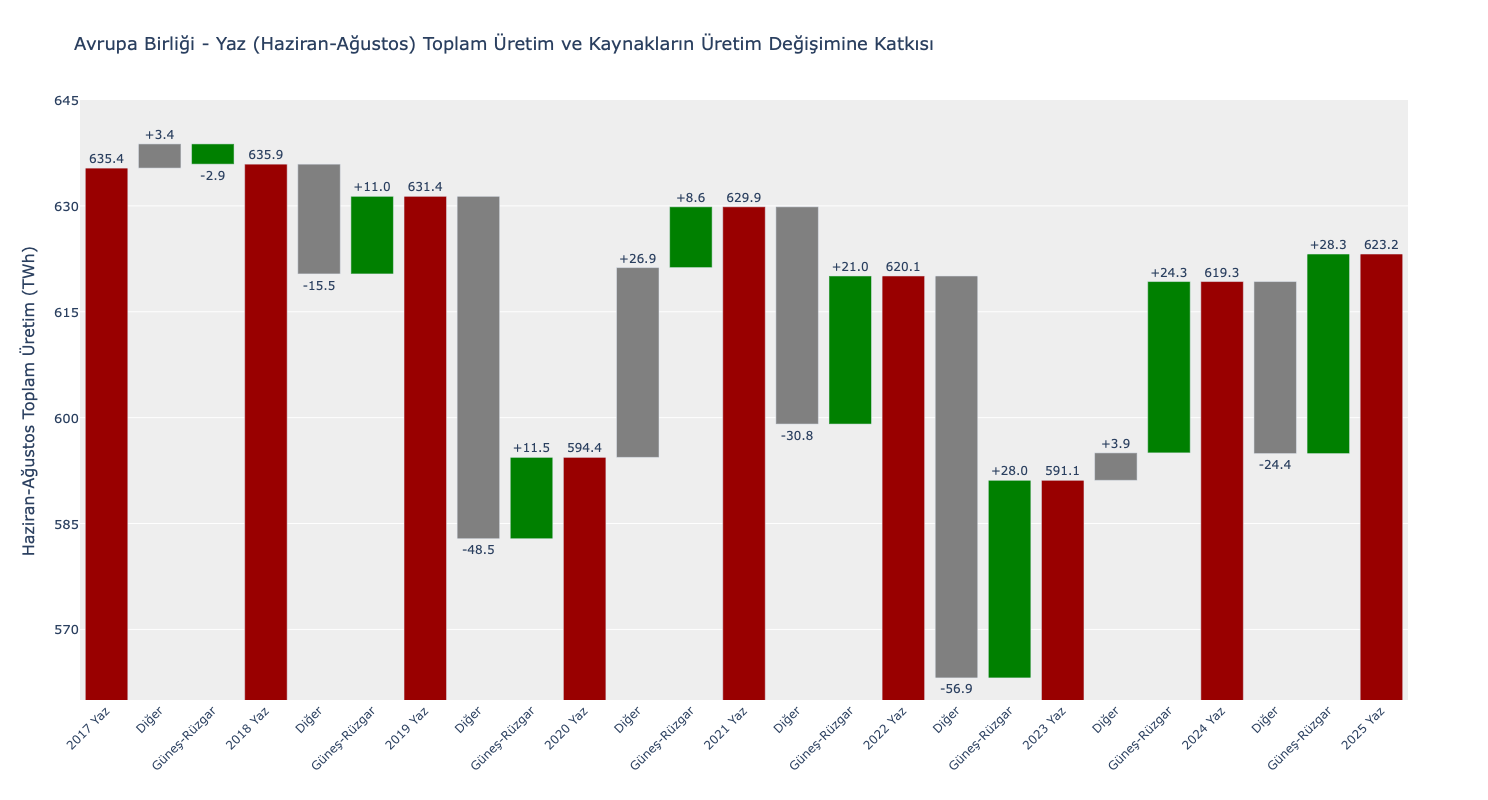

In [3]:
import plotly.graph_objects as go
import pandas as pd

# ───────────────────────────────────────────────
# 1. New Data (Summer/Yaz)
# ───────────────────────────────────────────────
data_summer = {
    'Period':  ['2017-06', '2018-06', '2019-06', '2020-06', 
                '2021-06', '2022-06', '2023-06', '2024-06', '2025-06'],
    'Solar':   [ 97.03,   94.16,   105.15,  116.67,  
                125.28,  146.26,  174.25,  198.52,  226.79],
    'Other':   [538.32,  541.75,  526.20,  477.70,  
                504.59,  473.81,  416.87,  420.76,  396.39],
    'Total':   [635.35,  635.91,  631.35,  594.37,  
                629.87,  620.07,  591.12,  619.28,  623.18]
}

df = pd.DataFrame(data_summer)

# ───────────────────────────────────────────────
# Helper: Format labels for Summer (Yaz)
# ───────────────────────────────────────────────
def get_summer_label(raw_period):
    # Extracts year "2017" from "2017-06"
    year = raw_period.split('-')[0]
    return f"{year} Yaz"

# ───────────────────────────────────────────────
# Calculate Waterfall Steps
# ───────────────────────────────────────────────

x_indices = []   # Unique integers to prevent grouping
tick_labels = [] # The text labels we want to see
y_values = [] 
bases = []    
text = []
colors = []

# Tracker for the running total and x-axis position
current_level = 0
counter = 0

# -- 1. Starting Point --
start_val = df['Total'].iloc[0]
start_label = get_summer_label(df['Period'].iloc[0])

x_indices.append(counter)
tick_labels.append(start_label)
y_values.append(start_val)
bases.append(0)           
text.append(f"{start_val:.1f}")
colors.append("#990000")   # Total (Red)
current_level = start_val
counter += 1

# -- 2. Loop through periods --
for i in range(1, len(df)):
    curr_total = df['Total'].iloc[i]
    formatted_period = get_summer_label(df['Period'].iloc[i])
    
    delta_o = df['Other'].iloc[i] - df['Other'].iloc[i-1]
    delta_s = df['Solar'].iloc[i] - df['Solar'].iloc[i-1]
    
    # -- Bar 1: Other (Diğer) Change --
    x_indices.append(counter)
    tick_labels.append("Diğer") 
    y_values.append(delta_o)
    bases.append(current_level)
    text.append(f"{delta_o:+.1f}")
    colors.append("gray")      # Other (Gray)
    current_level += delta_o
    counter += 1
    
    # -- Bar 2: Solar (Güneş-Rüzgar) Change --
    x_indices.append(counter)
    tick_labels.append("Güneş-Rüzgar") 
    y_values.append(delta_s)
    bases.append(current_level)
    text.append(f"{delta_s:+.1f}")
    colors.append("green")     # Solar (Green)
    current_level += delta_s
    counter += 1
    
    # -- Bar 3: Ending Total --
    x_indices.append(counter)
    tick_labels.append(formatted_period)
    y_values.append(curr_total)
    bases.append(0)            # Totals always start at 0
    text.append(f"{curr_total:.1f}")
    colors.append("#990000")   # Total (Red)
    
    # Reset current_level to exact total
    current_level = curr_total
    counter += 1

# ───────────────────────────────────────────────
# Create Figure
# ───────────────────────────────────────────────

fig = go.Figure(go.Bar(
    x            = x_indices,
    y            = y_values,
    base         = bases,          
    marker_color = colors,         
    text         = text,
    textposition = "outside",
    textfont     = dict(size=12),
))

fig.update_layout(
    title       = "Avrupa Birliği - Yaz (Haziran-Ağustos) Toplam Üretim ve Kaynakların Üretim Değişimine Katkısı",
    yaxis_title = "Haziran-Ağustos Toplam Üretim (TWh)",
    height      = 800,
    width       = 1520,
    font        = dict(size=13),
    showlegend  = False,
    plot_bgcolor  = "#EEEEEE",
    #paper_bgcolor = "white",
    margin      = dict(b=100), 
    yaxis       = dict(
        range     = [560, 645],  # Adjusted range for summer values
        tickmode  = 'linear',
        dtick     = 15,
    ),
    xaxis       = dict(
        tickmode  = 'array',
        tickvals  = x_indices,    # Map the unique integers...
        ticktext  = tick_labels,  # ...to the text labels
        tickangle = -45,
        tickfont  = dict(size=12)
    )
)

fig.show()